<a href="https://colab.research.google.com/github/mohan8git/ethnicity/blob/master/ethnicity_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD

In [0]:
!pwd

/content


In [0]:
train_path = "gdrive/My Drive/Colab Notebooks/Dataset/Data/train"
test_path = "gdrive/My Drive/Colab Notebooks/Dataset/Data/test"

In [0]:
batch_size = 64 
image_size_x = 178
image_size_y =218
num_class = 4

In [0]:
#Load the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size_x, image_size_y, 3))

print(base_model.summary())

    # Freeze the layers 
for layer in base_model.layers:
    layer.trainable = False
 
##Create the model
model = keras.models.Sequential()

# # Add the vgg convolutional base model
model.add(base_model)
 
# # Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(1))
model.add(Dense(num_class, activation='softmax'))
 
# # Show a summary of the model. Check the number of trainable parameters    
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 178, 218, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 178, 218, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 178, 218, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 89, 109, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 89, 109, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 89, 109, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 54, 128)       0     

In [0]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
          optimizer=SGD(lr=1e-3),
          metrics=['accuracy'])

train_datagen = ImageDataGenerator(
         zoom_range=0.2, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(image_size_x, image_size_y),
        batch_size=batch_size,
        class_mode='categorical',
         shuffle = True)
 
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(image_size_x, image_size_y),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 2338 images belonging to 4 classes.
Found 490 images belonging to 4 classes.


In [0]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data= validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/36 [=====================>........] - ETA: 3:33 - loss: 3.8747 - acc: 0.3601

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/36 [=======================>......] - ETA: 2:29 - loss: 3.7111 - acc: 0.3657

KeyboardInterrupt: ignored

In [0]:
model.save('ethnicity.h5')

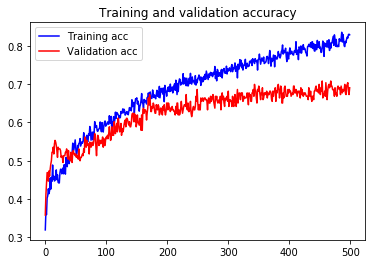

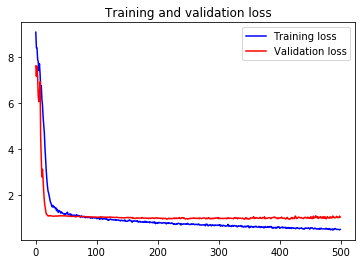

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
model.save_weights('model_saved.h5')

In [0]:
model = load_model("ethnicity.h5")

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import os
import heapq

model.compile(loss='categorical_crossentropy',
          optimizer=SGD(lr=1e-3),
          metrics=['accuracy'])


# def correct_path_function(path_name):
#     b =path_name.split("/")
#     del b[0]
#     delimiter = "/"
#     path = delimiter.join(b)
#     return path
  
# correct_path_function("content/gdrive/My Drive/GoogleColab/Project/Data/Check")
# path_of_test_files = path
# print(path_of_test_files)
  


path_of_test_files = "gdrive/My Drive/Tester"  

list_of_test_images = os.listdir(path_of_test_files)

for i in list_of_test_images: 
  image_name, image_ext = os.path.splitext(i)
  img_path = os.path.join(path_of_test_files, i)
  img = load_img(img_path, target_size=(178, 218))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  bruh = preds.flatten()
  predss= preds.tolist()
  duh = heapq.nlargest(3, range(len(bruh)), bruh.take) 
  y = os.listdir("gdrive/My Drive/Colab Notebooks/Dataset/Data/test")
  y.sort()
  print("Actual image: {}.....Predicted image: {},{}".format(image_name,y[duh[0]],y[duh[1]]))
  
  
#   preds = model.predict(x)  
#   #print(preds)
#   predicted_classes = np.argmax(preds,axis=1)
#   #print(predicted_classes)
#   y = os.listdir("Final Data/Test")
#   y.sort()
#   class_ = predicted_classes.tolist()
#   print("Actual image: {}.....Predicted image: {}".format(image_name,y[class_[0]]))
#   print(y[class_[0]])
#   # decode the results into a list of tuples (class, description, probability)
#   # (one such list for each sample in the batch)
#   #print('Predicted:', decode_predictions(preds, top=3))

Actual image: HEO 20171219.....Predicted image: white,asian
Actual image: handsome-young-asian-man-smiling-260nw-625939112.....Predicted image: asian,black
Actual image: indian1.....Predicted image: white,asian
Actual image: barackobama.....Predicted image: white,black
Actual image: black_women1.....Predicted image: black,asian
